<a href="https://colab.research.google.com/github/Siham-A-K/Fond.-of.-Data-Science/blob/main/Activity2_U24200503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

import necessary libraries

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [ ]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [ ]:
pm10_data

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10
0,NYCP1_01A,1579618560,40.847183,-73.870087,23,1,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,16.3,15.2,1.44,5.91,11.35
1,NYCP1_01A,1579618560,40.847183,-73.870094,18,2,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,16.2,15.1,1.05,1.18,1.18
2,NYCP1_01A,1579618560,40.847179,-73.870094,18,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,16.1,15.1,0.74,0.76,0.76
3,NYCP1_01A,1579618560,40.847179,-73.870094,18,1,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,16.1,15.2,1.15,4.48,47.36
4,NYCP1_01A,1579618560,40.847179,-73.870094,20,3,0,2,2,0,...,0.0,0.0,0.0,0.0,0.0,16.0,15.2,2.13,5.77,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118760,NYCP1_01A,1581033300,40.819511,-73.898369,40,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,14.0,86.0,3.91,4.03,4.03
118761,NYCP1_01A,1581033300,40.819511,-73.898369,48,2,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,14.0,86.1,4.87,6.15,6.20
118762,NYCP1_01A,1581033300,40.819511,-73.898369,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,14.1,86.0,0.00,0.00,0.00
118763,NYCP1_01A,1581033300,40.819511,-73.898369,37,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,13.9,86.4,2.45,2.49,2.49


### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [ ]:
# Create a GeoDataframe from pm10_data
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
print(pm10_gdf.crs)

None


In [ ]:
# Assign the same CRS to the CSV GeoDataFrame as the GeoJSON nyc_nighborhoods
pm10_gdf.set_crs(nyc_neighborhoods.crs, inplace=True)

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry
0,NYCP1_01A,1579618560,40.847183,-73.870087,23,1,2,0,0,0,...,0.0,0.0,0.0,0.0,16.3,15.2,1.44,5.91,11.35,POINT (-73.87009 40.84718)
1,NYCP1_01A,1579618560,40.847183,-73.870094,18,2,1,0,0,0,...,0.0,0.0,0.0,0.0,16.2,15.1,1.05,1.18,1.18,POINT (-73.87009 40.84718)
2,NYCP1_01A,1579618560,40.847179,-73.870094,18,1,0,0,0,0,...,0.0,0.0,0.0,0.0,16.1,15.1,0.74,0.76,0.76,POINT (-73.87009 40.84718)
3,NYCP1_01A,1579618560,40.847179,-73.870094,18,1,2,0,0,0,...,0.0,0.0,0.0,0.0,16.1,15.2,1.15,4.48,47.36,POINT (-73.87009 40.84718)
4,NYCP1_01A,1579618560,40.847179,-73.870094,20,3,0,2,2,0,...,0.0,0.0,0.0,0.0,16.0,15.2,2.13,5.77,6.18,POINT (-73.87009 40.84718)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118760,NYCP1_01A,1581033300,40.819511,-73.898369,40,6,0,0,0,0,...,0.0,0.0,0.0,0.0,14.0,86.0,3.91,4.03,4.03,POINT (-73.89837 40.81951)
118761,NYCP1_01A,1581033300,40.819511,-73.898369,48,2,1,1,0,0,...,0.0,0.0,0.0,0.0,14.0,86.1,4.87,6.15,6.20,POINT (-73.89837 40.81951)
118762,NYCP1_01A,1581033300,40.819511,-73.898369,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,14.1,86.0,0.00,0.00,0.00,POINT (-73.89837 40.81951)
118763,NYCP1_01A,1581033300,40.819511,-73.898369,37,1,0,0,0,0,...,0.0,0.0,0.0,0.0,13.9,86.4,2.45,2.49,2.49,POINT (-73.89837 40.81951)


In [ ]:
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

In [ ]:
#merged_data.dtypes

In [ ]:
pollution_data = merged_data[['pm10','neighborhood']]

In [ ]:
pollution_data.shape[0]

118495

In [ ]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [ ]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [ ]:
pollution_data['pm10'].min()

0.0

In [ ]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [ ]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [ ]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [ ]:
joined_table.show(5)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [ ]:
t_rows = joined_table.num_rows
t_cols = joined_table.num_columns
print(f"Number of rows: {t_rows}")
print(f"Number of columns: {t_cols}")

Number of rows: 118495
Number of columns: 2


In [ ]:
joined_table.where('pm10', are.equal_to(np.nan)).show()

pm10,neighborhood


In [ ]:
joined_table.where('neighborhood', are.equal_to(None)).show()

pm10,neighborhood


The table does not contain any rows or columns with missing value!

---

# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [ ]:
# Convert air information GeoDataframe to Table
# This table will be used in the rest of the tasks
air_data = Table().from_df(merged_data)
air_data.show(2)

SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,POINT (-73.870087 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,POINT (-73.870094 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park


In [ ]:
# Function returns column statistics using table operations
def column_stats(colName, col):
  return make_array(
      colName,
      np.mean(col),
      np.median(col),
      np.min(col),
      np.max(col)
  )

In [ ]:
# Table with all statistics of Temperature, Humidity and pm25 levels
air_stats = Table(make_array('Air Attributes', 'Mean', 'Median', 'Max', 'Min'))
air_stats = air_stats.with_rows(
    make_array(
        column_stats('Temperature', air_data.column('temperature')),
        column_stats('Humidity', air_data.column('humidity')),
        column_stats('PM25', air_data.column('pm25'))
    )
)
air_stats

Air Attributes,Mean,Median,Max,Min
Temperature,8.24157728174,7.2,-7.9,10471.0
Humidity,50.1548647622,46.2,0.0,104.2
PM25,7.37451588675,3.02,0.0,3267.02


In [ ]:
# Mean value of PM25 for each borough
borough_data = air_data.select('borough', 'pm25')
pm25_mean = borough_data.group('borough', np.mean)
pm25_mean

borough,pm25 mean
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

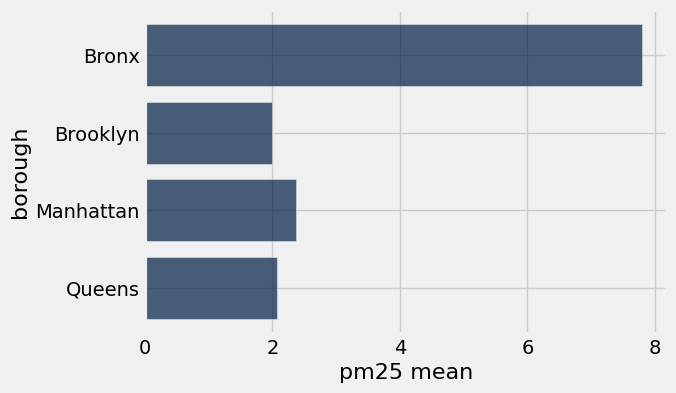

In [ ]:
# Visualizing the mean PM25 per borough
pm25_mean.barh('borough', 'pm25 mean')

Text(0.5, 1.0, 'Temperature vs PM25')

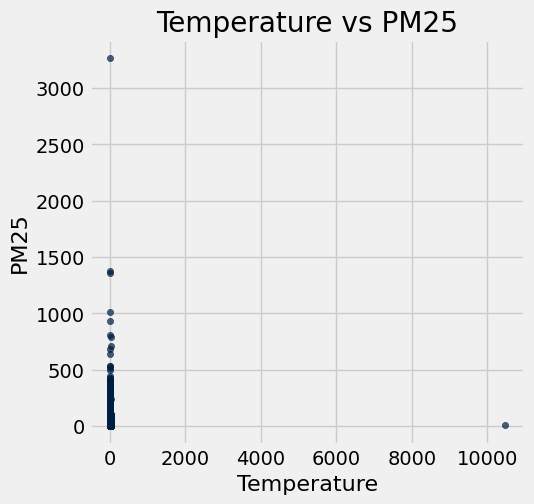

In [ ]:
# Scatter plot with Outliers visible
air_data.scatter('temperature', 'pm25')
plt.xlabel('Temperature') # Setting labels and title
plt.ylabel('PM25')
plt.title('Temperature vs PM25')

In [ ]:
# Detecting outlier of very high temperature
air_data.where('temperature', are.above(10000))

SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id
NYCP1_01A,1580838480,40.8189,-73.8985,145,15,6,0,1,0,0,0,207737,20773701,2,0,nan,nan,nan,13,1.52261e+09,10471,3,nan,nan,nan,105174,0,10471,3,6.55,8.24,8.4,POINT (-73.898514 40.818855),176,Longwood,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Longwood


(0.0, 1500.0)

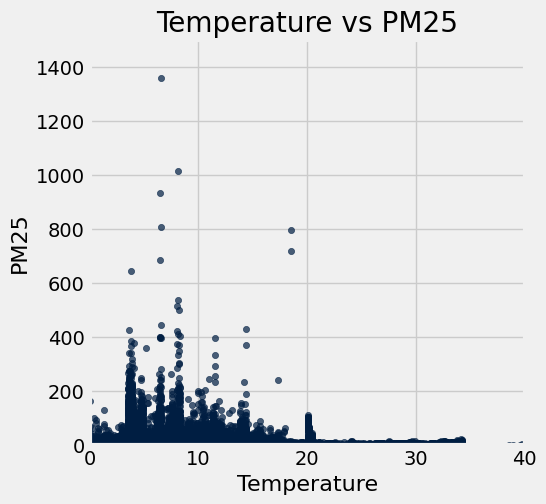

In [ ]:
# Narrowing Scatter plot's view excluding outliers (Outlier was not removed from the dataset, only resizing the x and y limits)
air_data.scatter('temperature', 'pm25')
plt.xlabel('Temperature') # Setting labels and title
plt.ylabel('PM25')
plt.title('Temperature vs PM25')
plt.xlim(0, 40) # Resizing limits on x range
plt.ylim(0, 1500) # Resizing limits on y range

Text(0, 0.5, 'Frequency')

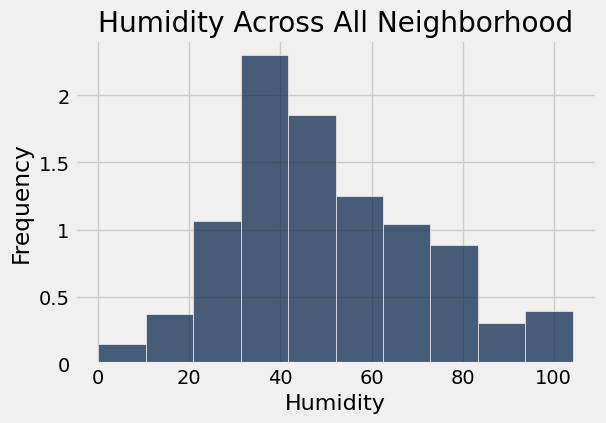

In [ ]:
# Visualizing humidity distribution on a histogram
air_data.hist('humidity')
plt.title('Humidity Across All Neighborhood') # Setting labels and title
plt.xlabel('Humidity')
plt.ylabel('Frequency')

# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [ ]:
# Function for categorizing the PM25 value as 'Good', 'Moderate' or 'Bad'
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return 'Good'
    elif 12 <= pm25 < 35:
        return 'Moderate'
    else:
        return 'Unhealthy'

pm_data = air_data.select('neighborhood', 'pm25')
pm_category = pm_data.with_column(
    'PM_25 Category', pm_data.apply(calculate_pm25_category, 'pm25') # Applying the function on the selected table and adding new column with categories
    )

pm_category

neighborhood,pm25,PM_25 Category
Bronx Park,5.91,Good
Bronx Park,1.18,Good
Bronx Park,0.76,Good
Bronx Park,4.48,Good
Bronx Park,5.77,Good
Bronx Park,0.73,Good
Bronx Park,1.22,Good
Bronx Park,4.57,Good
Bronx Park,5.61,Good
Bronx Park,1.29,Good


In [ ]:
# Grouping the table by categories, with frequency of each
pm_category.group('PM_25 Category')

PM_25 Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [ ]:
# Random sampling
sample_size = int(0.1 * air_data.num_rows)
sampled_data = air_data.sample(sample_size, with_replacement=False)

In [ ]:
# Mean value of the first random sample
sample_pm25 = sampled_data.column('pm25')
sample_mean = np.mean(sample_pm25)
print(f"Mean PM25 level for the sampled data: {round(sample_mean, 2)}")

Mean PM25 level for the sampled data: 7.36


In [ ]:
# Sampling 100 random samples
list_sample_means = []
for i in range(100):
  sampleItem = air_data.sample(sample_size, with_replacement=False)
  sampleItem_pm25 = sampleItem.column('pm25')
  sampleItem_mean = np.mean(sampleItem_pm25)
  list_sample_means.append(sampleItem_mean)

print(list_sample_means)

[7.2677981264241707, 7.5943387627647905, 7.3140121529242972, 7.31576588741666, 7.4866874841758806, 7.6303536163389314, 7.148294370832982, 7.4815300869271661, 7.3383973331082792, 7.6760249810110555, 7.1712676175204662, 7.7876377753396913, 7.3427462233099847, 7.4984893239935868, 7.1761456663009531, 7.2658460629588992, 7.7904261963034847, 6.9818322221284506, 7.3331698877542406, 7.6040172166427551, 7.2146695923706634, 7.4612633977550855, 7.4227133091400113, 7.2850080175542251, 7.6913469491096302, 7.068429403325176, 7.7106802261794245, 7.1101299687737356, 7.516777787155033, 7.6601240611022021, 7.5036053675415646, 7.505386108532365, 7.5175314372520887, 7.2187036880749424, 7.4913967423411254, 7.3518423495653646, 7.3429605873913415, 7.3308810870115613, 7.5416338931555416, 7.3965786142290488, 7.2243758967001437, 7.3662984218077474, 7.390218583846738, 7.1470124061102211, 7.3291121613638275, 7.4221824626550763, 7.6329867499367028, 7.5932981686218248, 7.3467701915773489, 7.3039910540973914, 7.4269

Text(0, 0.5, 'Frequency')

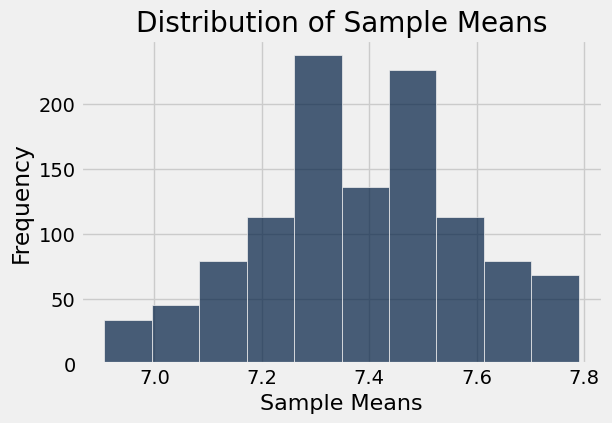

In [ ]:
# Converting list to a table column (list can not be visualized as a histogram)
list_sample_means_table = Table().with_column('Sample Means', list_sample_means)
list_sample_means_table.hist()
plt.title('Distribution of Sample Means') # Setting labels and title
plt.xlabel('Sample Means')
plt.ylabel('Frequency')

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.